In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-04-26 06:34:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.69.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.2MB/s    in 3.7s    

2023-04-26 06:34:44 (28.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

for filepath,dirname,filename in os.walk("pizza_steak"):
 print(f"There are {len(dirname)} directories and {len(filename)} images in '{filepath}.")

There are 2 directories and 0 images in 'pizza_steak.
There are 2 directories and 0 images in 'pizza_steak/test.
There are 0 directories and 250 images in 'pizza_steak/test/steak.
There are 0 directories and 250 images in 'pizza_steak/test/pizza.
There are 2 directories and 0 images in 'pizza_steak/train.
There are 0 directories and 750 images in 'pizza_steak/train/steak.
There are 0 directories and 750 images in 'pizza_steak/train/pizza.


In [ ]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import random 

def plot_random_image(target_dir,target_class):
  target_folder=target_dir+target_class

  random_img=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder + "/" + random_img[0])

  plt.imshow(img)
  plt.axis("off")
  print(f"Image Shape :{img.shape}")
  return img


Image Shape :(512, 384, 3)


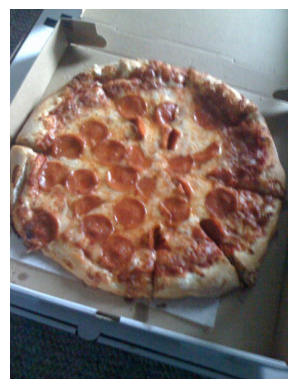

In [ ]:
img=plot_random_image(target_dir="pizza_steak/train/",target_class="pizza")

Getting Our Data Ready

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             class_mode="binary",
                                             target_size=(224,224),
                                             seed=42)
valid_data=train_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             class_mode="binary",
                                             target_size=(224,224),
                                             seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

Building CNN Model

Lets Try With Diffrent Model

In [ ]:
def plot_loss_curve(history):

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plot loss 
  plt.figure(figsize=(7,5))
  plt.plot(epochs,loss,label="Loss")
  plt.plot(epochs,val_loss,label="Val_oss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot Accuracy
  plt.figure(figsize=(7,5))
  plt.plot(epochs,accuracy,label="accuracy,")
  plt.plot(epochs,val_accuracy,label="Val_accuracy,")
  plt.title("accuracy,")
  plt.xlabel("epochs")
  plt.legend()



Finding Data Augmentation:-

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.0,
                                              rotation_range=20,
                                              zoom_range=0.2,
                                              shear_range=0.2,
                                              horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.0)

test_datagen=ImageDataGenerator(rescale=1/255.0)
train_dir="pizza_steak/train"
test_dir="pizza_steak/test"

In [ ]:
print("Augmented Training Data:-")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(244,244),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
print("Non-Augmented Training Data:-")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(244,244),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)
print("Non-Augmented Testing Data:-")
test_data=test_datagen.flow_from_directory(test_dir,
                                             target_size=(244,244),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)


Augmented Training Data:-
Found 1500 images belonging to 2 classes.
Non-Augmented Training Data:-
Found 1500 images belonging to 2 classes.
Non-Augmented Testing Data:-
Found 500 images belonging to 2 classes.


In [ ]:

images,labels=train_data.next()
augmented_images,augmented_labels=train_data_augmented.next()
len(augmented_images),len(augmented_labels)

(32, 32)

(-0.5, 243.5, 243.5, -0.5)

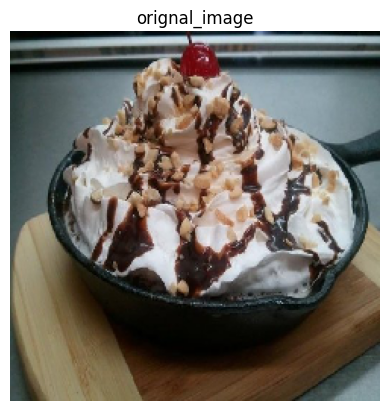

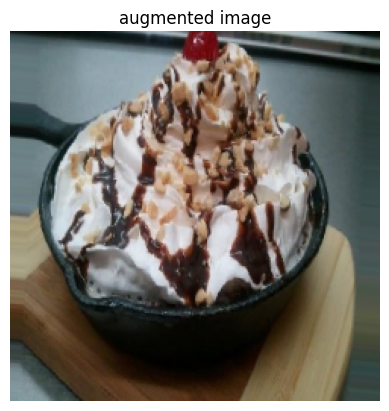

In [ ]:
import random 

random_choice=random.randint(0,31)
plt.figure()
plt.imshow(images[random_choice])
plt.title("orignal_image")
plt.axis("off")
plt.figure()
plt.imshow(augmented_images[random_choice])
plt.title("augmented image")
plt.axis("off")

code without input shape

In [ ]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu"),
   
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])


model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 41s 708ms/step - loss: 0.8464 - accuracy: 0.4767 - val_loss: 0.6709 - val_accuracy: 0.5900
Epoch 2/5
47/47 [==============================] - 27s 568ms/step - loss: 0.6891 - accuracy: 0.5173 - val_loss: 0.6116 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 27s 577ms/step - loss: 0.5709 - accuracy: 0.7033 - val_loss: 0.7116 - val_accuracy: 0.5700
Epoch 4/5
47/47 [==============================] - 27s 576ms/step - loss: 0.5890 - accuracy: 0.7153 - val_loss: 0.4669 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 31s 643ms/step - loss: 0.5203 - accuracy: 0.7573 - val_loss: 0.4101 - val_accuracy: 0.8200


In [ ]:
print("Augmented Training Data:-")
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(244,244),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True)

Augmented Training Data:-
Found 1500 images belonging to 2 classes.


Same Code with input shape

In [ ]:
model_11=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",input_shape=(244,244,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
    ])


model_11.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_11=model_11.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 677ms/step - loss: 0.6135 - accuracy: 0.6660 - val_loss: 0.4459 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 28s 594ms/step - loss: 0.4856 - accuracy: 0.7780 - val_loss: 0.4119 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 28s 590ms/step - loss: 0.4666 - accuracy: 0.7933 - val_loss: 0.3950 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 30s 647ms/step - loss: 0.4646 - accuracy: 0.7880 - val_loss: 0.3817 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 27s 576ms/step - loss: 0.4502 - accuracy: 0.7993 - val_loss: 0.3600 - val_accuracy: 0.8660


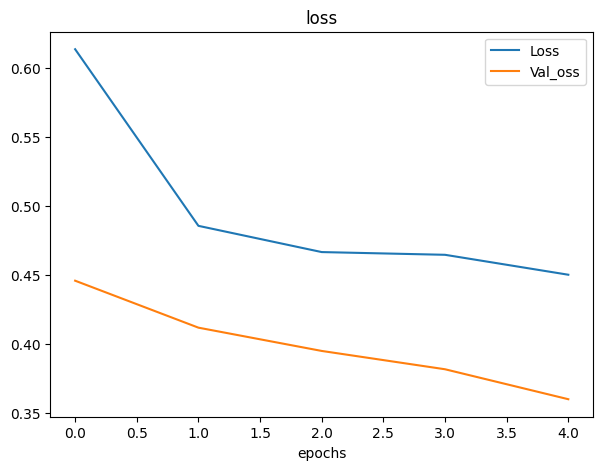

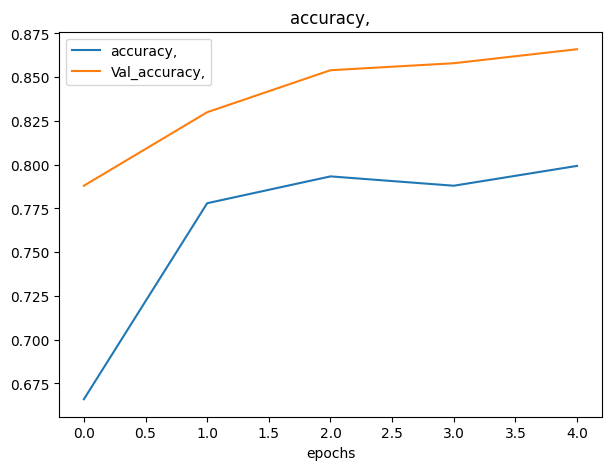

In [ ]:
plot_loss_curve(history_11)

import custom img 

--2023-04-26 07:04:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-04-26 07:04:07 (87.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



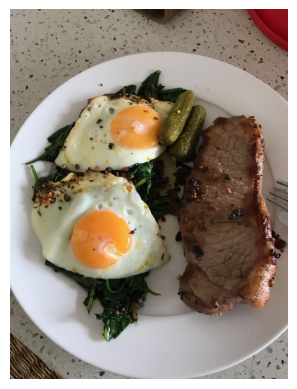

In [ ]:
# view our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!rm -rf 03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model
def load_and_prep_image(file_name, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape,img_shape,colour_channels)
    """
    # Read in the image
    img = tf.io.read_file(file_name)
    # Decode the read file into a tesor
    img = tf.image.decode_jpeg(img)
    # Resize the image
    img = tf.image.resize(img,size=[244,244])
    # Rescale the image (get all values between 0 and 1)
   
    img = img/255.
    return img



In [ ]:
steak=load_and_prep_image("03-steak.jpeg")
steak.shape

TensorShape([244, 244, 3])

In [ ]:
a=tf.expand_dims(steak,axis=0)
model_11.predict(a)

1/1 [==============================] - 0s 253ms/step


array([[0.792847]], dtype=float32)

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_nmaes from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
def pred_and_plot(model,filename,class_name=class_names):
  img=load_and_prep_image(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))

  pred_class=class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"prediction:{pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 32ms/step


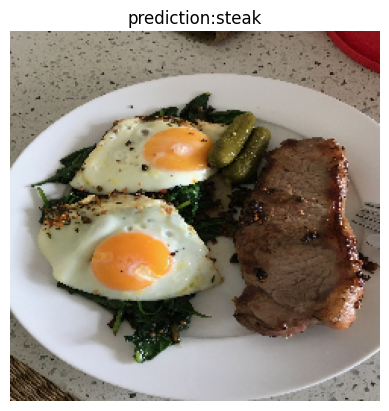

In [ ]:
pred_and_plot(model_11,"03-steak.jpeg")

1/1 [==============================] - 0s 30ms/step


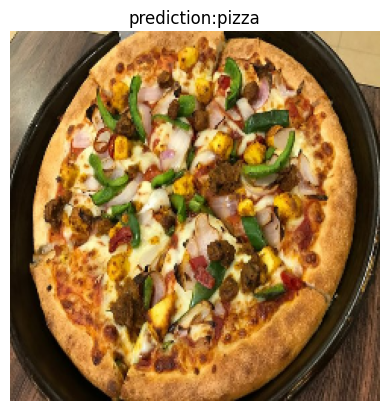

In [ ]:
pred_and_plot(model_11,"pizza-hut.jpg")